<a href="https://colab.research.google.com/github/ZahraEk/Digital-Image-Proccesing/blob/main/DIP_EXC4_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Required libraries :

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### Q1 :


1.**Euclidean method :**




Original Image :



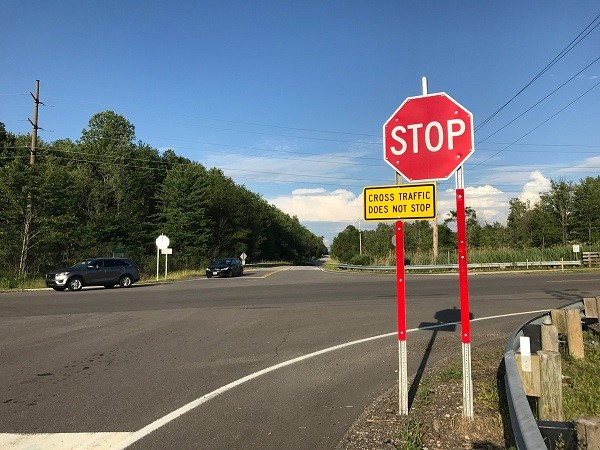


Separating the red part of the image with with the Euclidean method and threshold values : 80, 100, 150, 200.



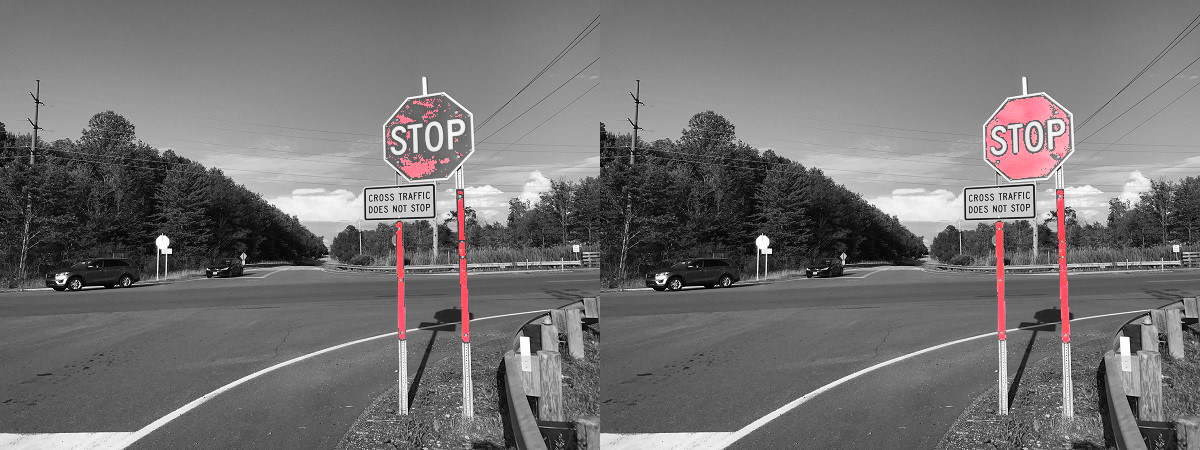

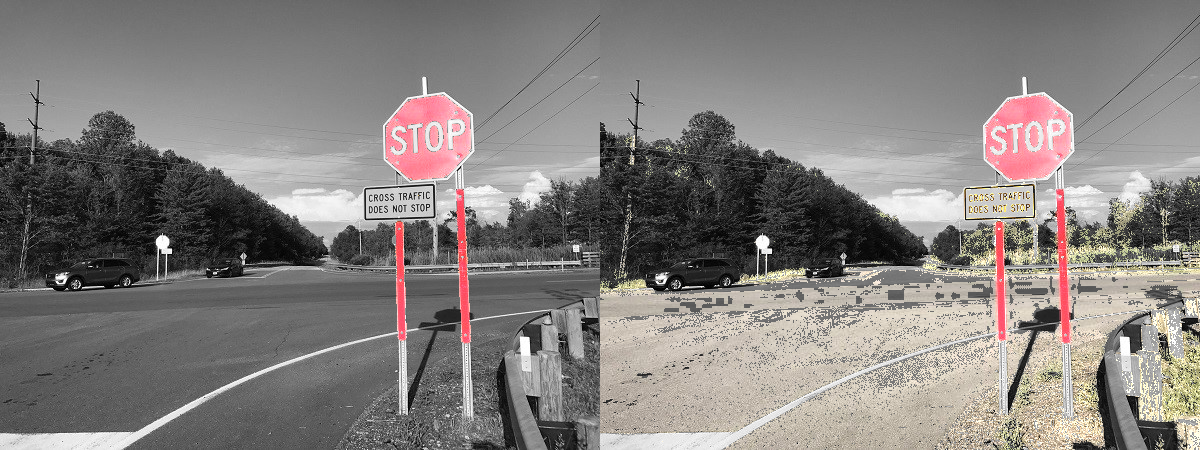

In [73]:
# Read the image
img = cv2.imread("drive/MyDrive/DIP_EXC4/Q1/Q1_img.jpg")

# Define the target color(Red) for segmentation
target_color = np.array([0, 0, 255])  

# Calculate Euclidean distance between each pixel and the target color
distances = np.sqrt(np.sum((img - target_color) ** 2, axis=2))

# Define threshold values
thresholds = [80, 100, 150, 200]

# Apply the masks to the image to get the red segments
red_segments = []
for th in thresholds:
    mask = np.where(distances <= th, 255, 0).astype(np.uint8)
    red_segment = cv2.bitwise_and(img, img, mask=mask)
    red_segments.append(red_segment)

# Convert the rest of the image to gray
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Combine the red segments and gray image
results = []
for red_segment in red_segments:
    result = cv2.add(red_segment, gray_image)
    results.append(result)

result1 = np.concatenate((results[0], results[1]), axis=1)
result2 = np.concatenate((results[2], results[3]), axis=1)

# Show the images
print("Original Image :\n")
cv2_imshow(img)

print("\nSeparating the red part of the image with with the Euclidean method and threshold values : 80, 100, 150, 200.\n")
cv2_imshow(result1)
cv2_imshow(result2)

cv2.waitKey(0)
cv2.destroyAllWindows()

**Conclusion:** The best threshold value in this method is 150.


---








2.   **Cube method :**





Original Image :



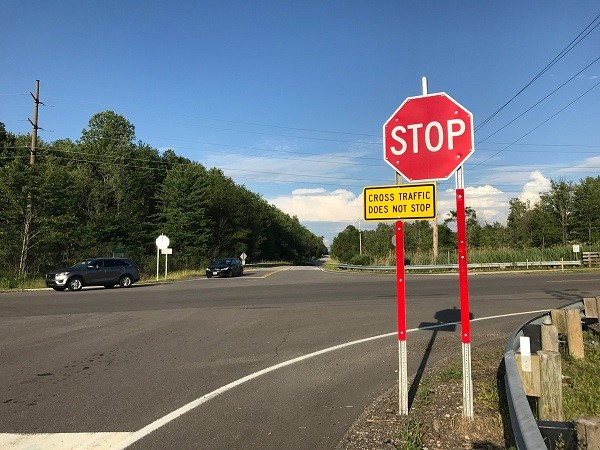


Separating the red part of the image with with the cube method and threshold values : 100, 150, 200, 255.



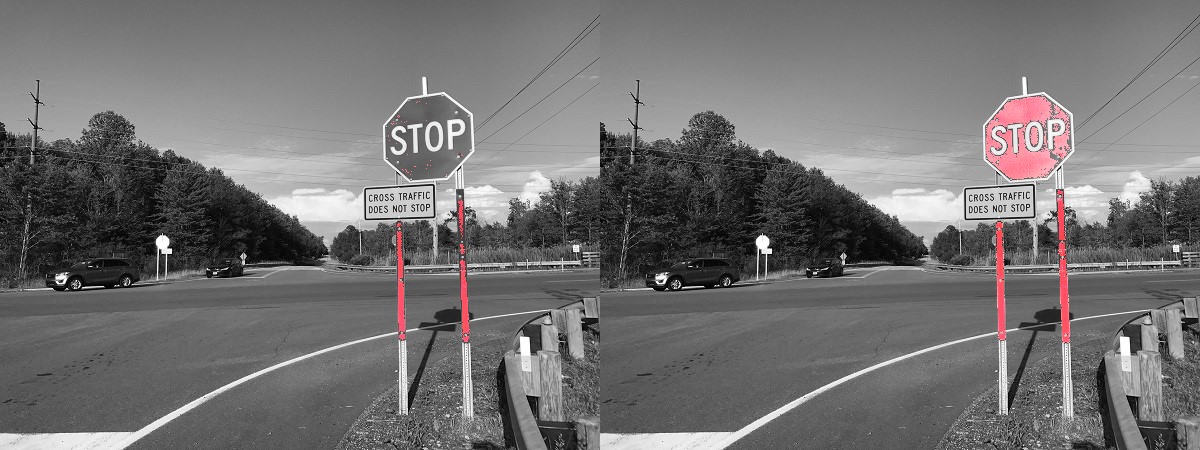

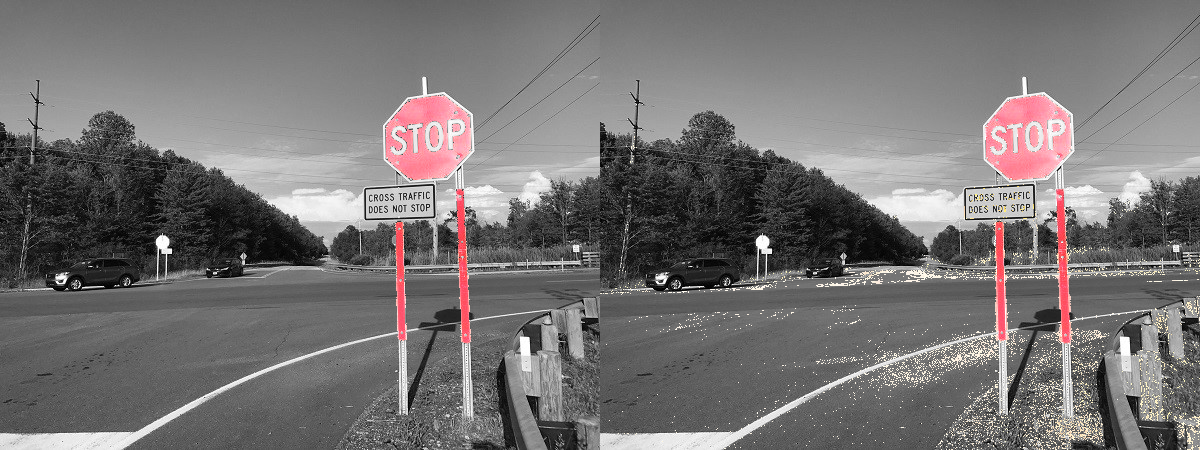

In [72]:
# Calculate the absolute differences between each channel and the target color
diff = np.abs(img.astype(np.int32) - target_color.astype(np.int32))

# Calculate the maximum difference along the channel axis
max_diff = np.max(diff, axis=2)

# Define threshold values
thresholds = [100, 150, 200, 255]

# Apply the masks to the image to get the red segments
red_segments = []
for th in thresholds:
    mask = np.where(max_diff <= th/2, 255, 0).astype(np.uint8)
    red_segment = cv2.bitwise_and(img, img, mask=mask)
    red_segments.append(red_segment)

# Combine the red segments and gray image
results = []
for red_segment in red_segments:
    result = cv2.add(red_segment, gray_image)
    results.append(result)

result1 = np.concatenate((results[0], results[1]), axis=1)
result2 = np.concatenate((results[2], results[3]), axis=1)

# Show the images
print("Original Image :\n")
cv2_imshow(img)

print("\nSeparating the red part of the image with with the cube method and threshold values : 100, 150, 200, 255.\n")
cv2_imshow(result1)
cv2_imshow(result2)

cv2.waitKey(0)
cv2.destroyAllWindows()

**Conclusion:** The best threshold value in this method is 200.


---


